In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

<AxesSubplot:>

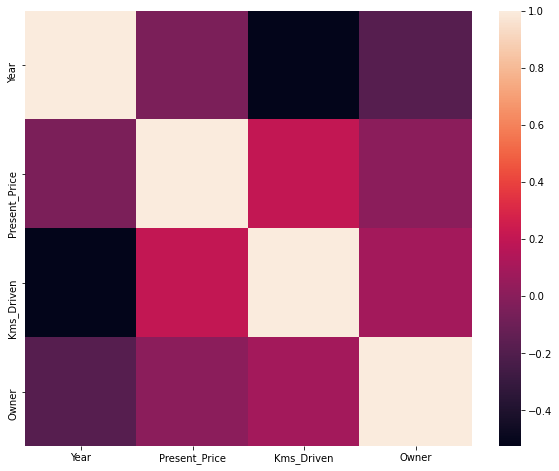

In [4]:
plt.figure(figsize=(10,8))
sns.heatmap(df.drop('Selling_Price',axis=1).corr())

In [5]:
df['Current_Year'] = 2020

In [6]:
df['Year_passed'] = df['Current_Year'] -df['Year']

In [7]:
df.drop(['Year','Current_Year','Car_Name'],axis=1,inplace=True)

In [8]:
df.Owner.unique()

array([0, 1, 3], dtype=int64)

In [9]:
df

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year_passed
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,4
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,5
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,11
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,3


In [10]:
df_new = pd.get_dummies(df,drop_first=True)

In [11]:
df_new

,Selling_Price,Present_Price,Kms_Driven,Owner,Year_passed,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,4,1,0,0,1
297,4.00,5.90,60000,0,5,0,1,0,1
298,3.35,11.00,87934,0,11,0,1,0,1
299,11.50,12.50,9000,0,3,1,0,0,1


In [12]:
df.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [13]:
X = df_new.drop('Selling_Price',axis=1)
y=df['Selling_Price']

In [14]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=2)

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


rf = RandomForestRegressor()

n_estimators = [int(x) for x in np.linspace(10,200,15)]
max_features = ['sqrt','auto','log2']
max_depth = [int(x) for x in np.linspace(10,1000,15)]
min_sample_split = [int(x) for x in range(1,20,2)]
min_sample_leaf = [int(x) for x in range(1,20,2)]
random_grid = dict(n_estimators=n_estimators,max_features = max_features,max_depth=max_depth,min_samples_split=min_sample_split,min_samples_leaf=min_sample_leaf)


clf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,n_iter=100,cv=5,verbose=2,n_jobs=-1,random_state=10,scoring = 'neg_mean_squared_error')
clf_random.fit(Xtrain,ytrain)
clf_random.predict(Xtest)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   49.7s finished


array([ 8.71582545,  0.54785696,  3.96148692,  3.56682236, 10.45321984,
        4.61810098,  3.37465507,  6.84257894,  0.26617213,  5.70713741,
        7.46973044,  4.22027524,  0.31997123,  9.14000215,  2.5651197 ,
        0.68264257,  0.66516487,  0.42690166,  9.78665982,  4.24911146,
        1.29846679,  6.91032706,  0.43193513, 10.30101641,  0.5744524 ,
        7.59131765,  0.62222453,  0.21904487,  3.08631738,  2.57300417,
        0.43154031,  3.21472227,  6.06085313,  9.20937324,  0.46549249,
        5.04791259,  8.0828139 ,  5.69741893,  7.38646557,  5.01912689,
       19.30316564,  0.71849277,  0.4095095 ,  0.50378392,  6.2446149 ,
        8.02237511,  0.32809916,  5.04517991, 15.97367848,  2.74949185,
        7.6049961 ,  0.49559839,  6.87041239,  0.56831914,  0.71849277,
        0.49446643,  0.3989858 ,  6.40460228,  0.51797723,  0.19522554,
        7.50858855])

In [16]:
from sklearn.metrics import mean_squared_error 
y_pred = clf_random.predict(Xtest)
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(ytest, y_pred)))
print('accuracy:',clf_random.score(Xtest,ytest))


Root Mean Squared Error: 1.0041257158191597
accuracy: -1.00826845316934


In [17]:
import pickle
file = open('random_forest.pkl','wb')
pickle.dump(clf_random,file)